In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\ensemble learning\car_evaluation.csv")
df.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
df.shape

(1728, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [6]:
###col_name
##df.col_name =col_name### ( if u want to rename )

In [7]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [30]:
cols=df.columns
df[cols].value_counts

<bound method DataFrame.value_counts of      buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]>

In [31]:
#choose target variable
df["class"].value_counts

<bound method IndexOpsMixin.value_counts of 0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object>

In [32]:
#declare feature vector and target variable
x=df.drop(["class"],axis=1)
y=df["class"]

In [33]:
X = df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']]

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [38]:
X = df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']]

In [39]:
#here if we get same datatype then encoding is not needed if we get differ then must do
x_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [40]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [51]:
print(x_train.columns)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')


In [52]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


In [54]:
x_train=encoder.fit_transform(x_train)
x_test=encoder.transform(x_test)

In [59]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [60]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1201,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
628,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1498,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [62]:
print(len(x_train), len(y_train))  # Should be the same
print(len(x_test), len(y_test))    # Should be the same


1157 1157
571 571


In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.6952714535901926

In [68]:
##n_estimator=100
rfc_100=RandomForestClassifier(n_estimators=100,random_state=0)
rfc_100.fit(x_train,y_train)
y_pred_100 = rfc_100.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_100)

0.6952714535901926

In [69]:
###find important features
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,random_state=0)

In [70]:
clf.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [75]:
##view  feature scores
feature_scores=pd.Series(clf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_scores


safety      0.295319
persons     0.233856
buying      0.151734
maint       0.146653
lug_boot    0.100048
doors       0.072389
dtype: float64

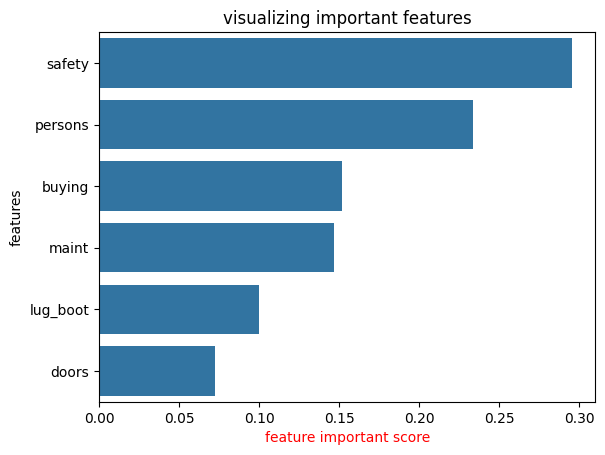

In [80]:

import matplotlib.pyplot as plt
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.xlabel("feature important score",color="red")
plt.ylabel("features")
plt.title("visualizing important features")
plt.show()

In [84]:
### build random forest model on selected features
x=df.drop(["class","doors"],axis=1)
y=df["class"]

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [86]:
encoder=ce.OrdinalEncoder(cols=['buying', 'maint',  'persons', 'lug_boot', 'safety'])
x_train=encoder.fit_transform(x_train)
x_test=encoder.transform(x_test)


In [87]:
clf=RandomForestClassifier(random_state=0)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9264448336252189

In [88]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n         acc       0.89      0.81      0.85       129\n        good       0.56      0.90      0.69        20\n       unacc       0.97      0.97      0.97       397\n       vgood       0.80      0.80      0.80        25\n\n    accuracy                           0.93       571\n   macro avg       0.81      0.87      0.83       571\nweighted avg       0.93      0.93      0.93       571\n'